In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [73]:
df = pd.read_csv('/Users/anithasmac/Projects/CustomerJourneyMapping/Cleaned_Amazon_Data.csv')

In [74]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### Feature Engineering

In [75]:
# Extract key features like brand name
df['brand'] = df['product_name'].str.split().str[0]

In [76]:
# Normalize text data in reviews and product descriptions

def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into string
    return ' '.join(tokens)

In [77]:
# Download necessary NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/anithasmac/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anithasmac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
# Apply normalization to review content and product descriptions
df['normalized_review'] = df['review_content'].fillna('').apply(normalize_text)
df['normalized_product_name'] = df['product_name'].fillna('').apply(normalize_text)
df['normalized_about_product'] = df['about_product'].fillna('').apply(normalize_text)

In [79]:
# Calculate price differential
df['price_differential'] = df['actual_price'] - df['discounted_price']
df['discount_percentage'] = (df['price_differential'] / df['actual_price']) * 100

In [82]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,brand,normalized_review,normalized_product_name,normalized_about_product,price_differential
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,63.694268,4.2,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Wayona,looks durable charging fine toono complainscha...,wayona nylon braided usb lightning fast chargi...,high compatibility compatible iphone 12 11 xxs...,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,42.979943,4.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Ambrane,ordered cable connect phone android auto car c...,ambrane unbreakable 60w 3a fast charging 15m b...,compatible type c enabled devices android smar...,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,89.520800,3.9,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Sounce,quite durable sturdyhttpsmmediaamazoncomimages...,sounce fast phone charging cable data sync usb...,fast charger data syncwith builtin safety proc...,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,52.932761,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,boAt,good productlong wirecharges goodnicei bought ...,boat deuce usb 300 2 1 typec micro usb stress ...,boat deuce usb 300 2 1 cable compatible smartp...,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.403509,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Portronics,bought instead original apple work 150rs fast ...,portronics konnect l 12m fast charging 3a 8 pi...,charge sync function cable comes charging data...,245.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                1465 non-null   object 
 1   product_name              1465 non-null   object 
 2   category                  1465 non-null   object 
 3   discounted_price          1465 non-null   float64
 4   actual_price              1465 non-null   float64
 5   discount_percentage       1465 non-null   float64
 6   rating                    1465 non-null   float64
 7   about_product             1465 non-null   object 
 8   user_id                   1465 non-null   object 
 9   user_name                 1465 non-null   object 
 10  review_id                 1465 non-null   object 
 11  review_title              1465 non-null   object 
 12  review_content            1465 non-null   object 
 13  img_link                  1465 non-null   object 
 14  product_

### Encoding the categorical columns

In [84]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'about_product',
       'user_id', 'user_name', 'review_id', 'review_title', 'review_content',
       'img_link', 'product_link', 'brand', 'normalized_review',
       'normalized_product_name', 'normalized_about_product',
       'price_differential'],
      dtype='object')

### Data Visualizations

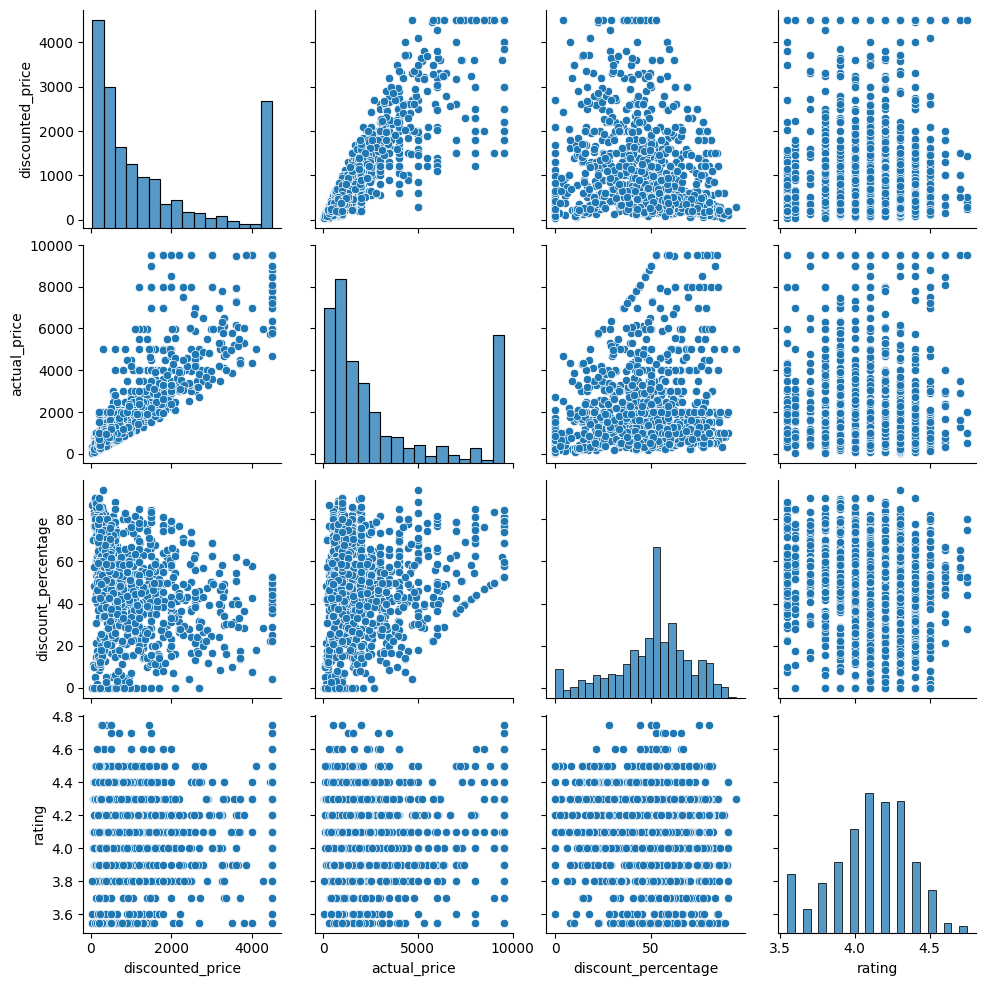

In [85]:
sns.pairplot(df[['discounted_price', 'actual_price', 'discount_percentage', 'rating']])
plt.show()

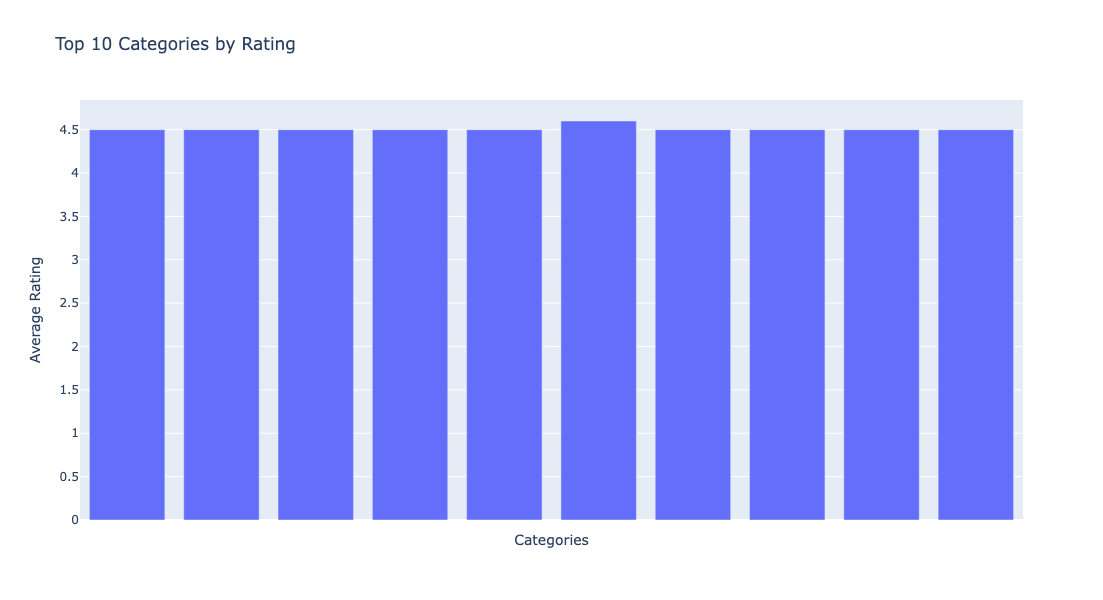

In [86]:
import plotly.express as px

# Select the top 10 categories by avg_rating
top_10_categories = df.groupby('category')['rating'].mean().nlargest(10).index

# Filter the DataFrame to include only the top 10 categories
df_top_10 = df[df['category'].isin(top_10_categories)]

# Plotly figure without showing category values on the x-axis
fig = px.bar(df_top_10, x='category', y='rating', hover_name='category',
             title='Top 10 Categories by Rating')

# Update axis labels and hide x-axis tick labels
fig.update_layout(
    xaxis_title="Categories",
    yaxis_title="Average Rating",
    xaxis_tickangle=-90,
    xaxis_showticklabels=False,  # Hides the category names on the x-axis
    height=600,
    width=1000
)

# Show the interactive plot
fig.show()


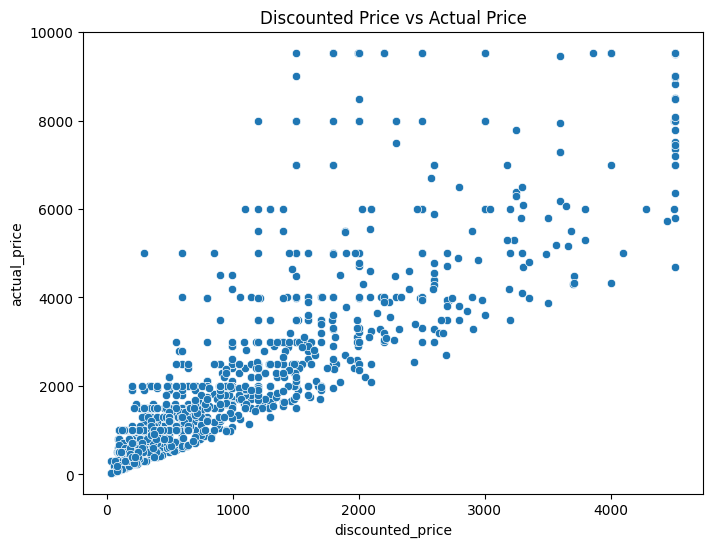

In [87]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='discounted_price', y='actual_price', data=df)
plt.title('Discounted Price vs Actual Price')
plt.show()

### Encode the variables

In [88]:
# Initialize a dictionary to store the LabelEncoders
encoders = {}

# List of columns to encode
columns_to_encode = ['product_id', 'category', 'review_id', 'review_content', 'product_name', 
                     'user_name', 'about_product', 'user_id', 'review_title', 
                     'img_link', 'product_link', 'brand', 'normalized_review', 'normalized_product_name', 'normalized_about_product']

# Encoding step
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Store the encoder for future decoding

In [89]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,brand,normalized_review,normalized_product_name,normalized_about_product,price_differential
0,346,1158,10,399.0,1099.0,63.694268,4.2,474,623,522,817,881,604,1118,1308,404,589,1251,557,700.0
1,848,134,10,199.0,349.0,42.979943,4.0,279,88,207,1025,7,413,1248,157,28,705,130,334,150.0
2,819,1023,10,199.0,1899.0,89.520800,3.9,1250,849,482,827,422,674,876,1160,345,872,1101,476,1700.0
3,643,1264,10,329.0,699.0,52.932761,4.2,1010,254,614,786,376,269,518,380,427,388,213,219,370.0
4,588,829,10,154.0,399.0,61.403509,4.2,1189,17,1139,114,44,120,1209,919,283,103,900,254,245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,673,696,192,379.0,919.0,58.759521,4.0,902,1050,646,804,868,425,595,771,246,900,775,1144,540.0
1461,201,850,172,2280.0,3045.0,25.123153,4.1,76,425,537,779,1167,1184,612,946,286,688,920,80,765.0
1462,27,164,138,2219.0,3080.0,27.954545,3.6,520,865,596,288,1181,1186,1088,201,43,756,163,622,861.0
1463,61,462,129,1399.0,1890.0,25.978836,4.0,395,300,885,749,212,375,1130,548,149,506,491,471,491.0


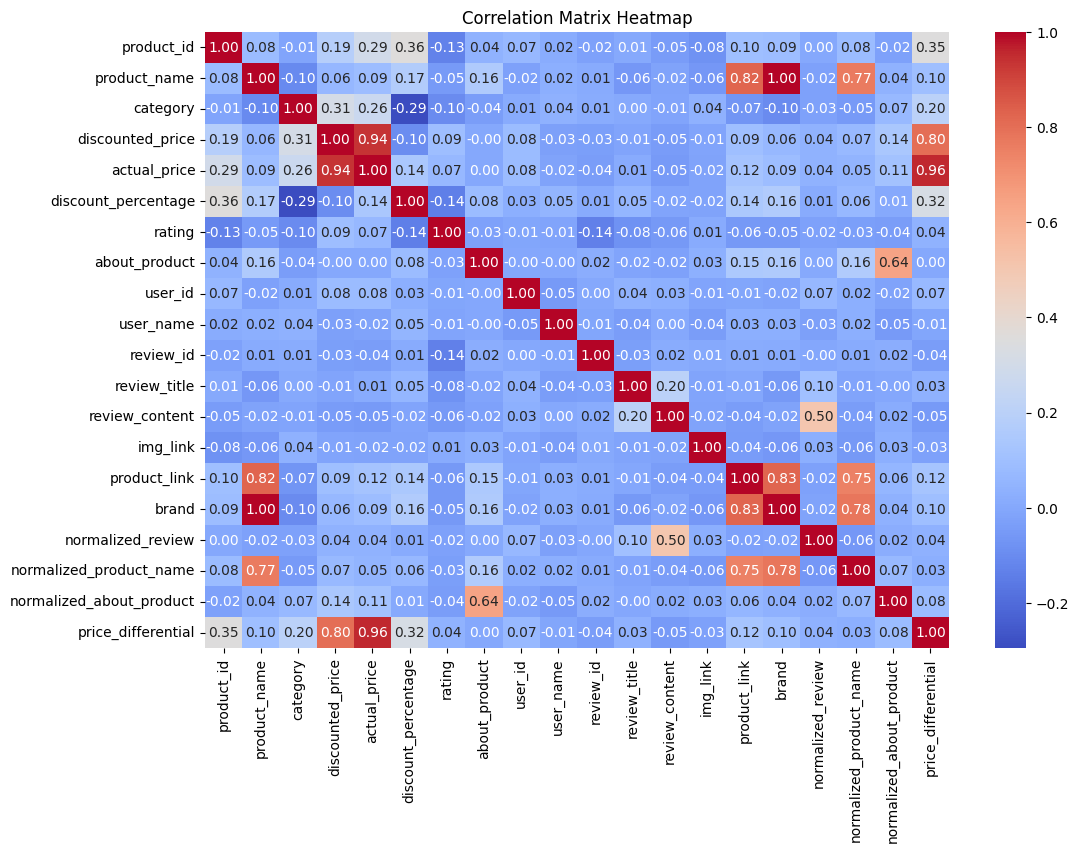

In [92]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [93]:
# Decoding step
for col in columns_to_encode:
    df[col] = encoders[col].inverse_transform(df[col])

In [94]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,brand,normalized_review,normalized_product_name,normalized_about_product,price_differential
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,63.694268,4.2,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Wayona,looks durable charging fine toono complainscha...,wayona nylon braided usb lightning fast chargi...,high compatibility compatible iphone 12 11 xxs...,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,42.979943,4.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Ambrane,ordered cable connect phone android auto car c...,ambrane unbreakable 60w 3a fast charging 15m b...,compatible type c enabled devices android smar...,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,89.520800,3.9,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Sounce,quite durable sturdyhttpsmmediaamazoncomimages...,sounce fast phone charging cable data sync usb...,fast charger data syncwith builtin safety proc...,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,52.932761,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,boAt,good productlong wirecharges goodnicei bought ...,boat deuce usb 300 2 1 typec micro usb stress ...,boat deuce usb 300 2 1 cable compatible smartp...,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.403509,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Portronics,bought instead original apple work 150rs fast ...,portronics konnect l 12m fast charging 3a 8 pi...,charge sync function cable comes charging data...,245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitche

In [95]:
df.to_csv('Featured_Amazon_Data.csv', index=False)